> ### 🧩 STEP 1 — Load Dataset from Databricks Table

In [0]:
# Load table into Spark and convert to Pandas
df_spark = spark.table("default.telco_customer_churn")
df = df_spark.toPandas()

# Show top rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###🧹 STEP 2 — Data Cleaning & Preprocessing

In [0]:
import pandas as pd
import numpy as np

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop customerID (not useful for modeling)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert categorical features into dummy/encoded form
df = pd.get_dummies(df, drop_first=True)

print("Shape after cleaning:", df.shape)


Shape after cleaning: (7043, 31)


###🔍 STEP 3 — Exploratory Data Analysis (EDA)

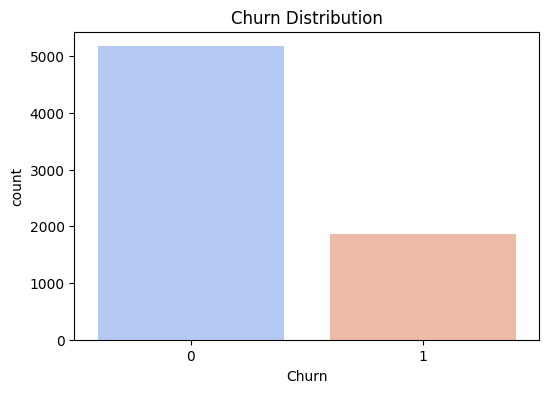

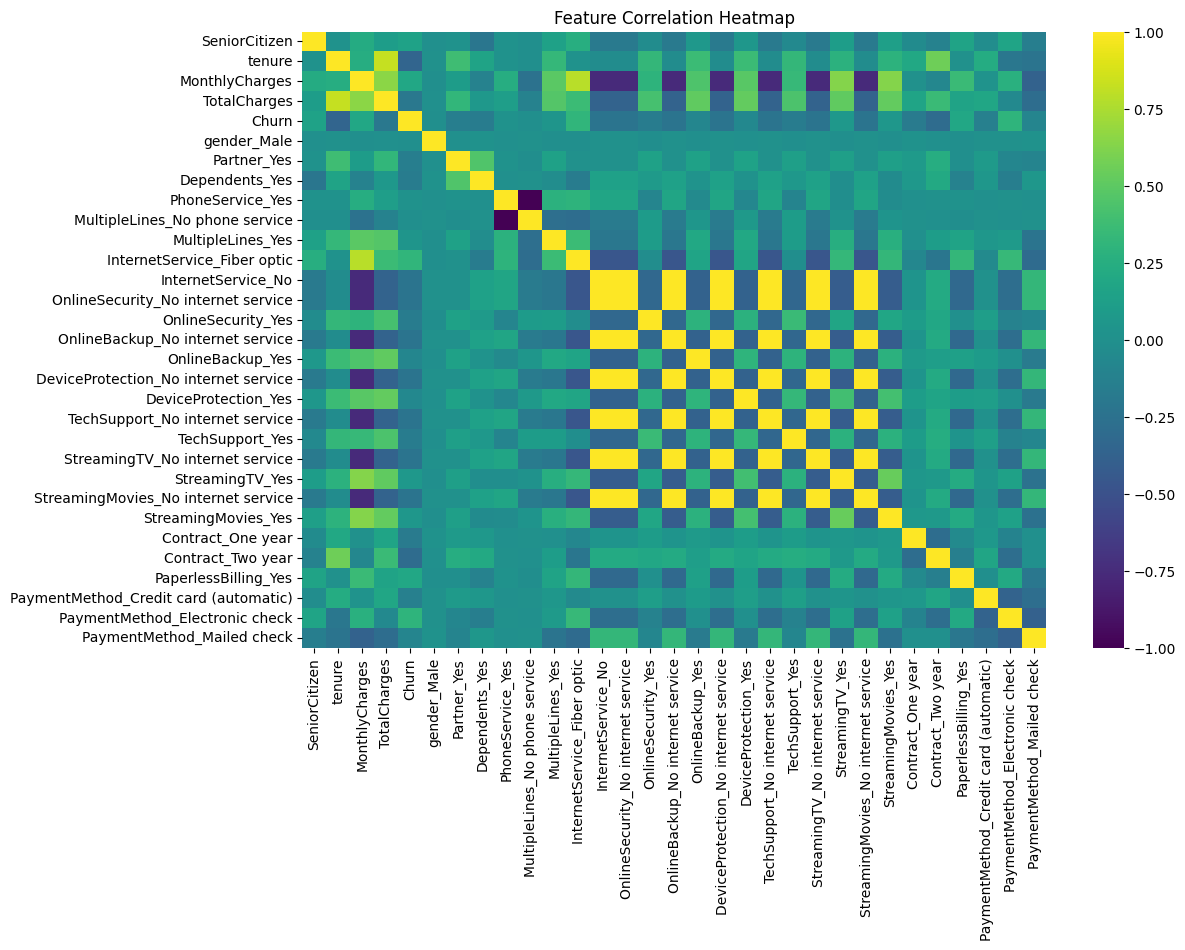

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


###🔀 STEP 4 — Split Data into Train/Test Sets

In [0]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (5634, 30)
Test set: (1409, 30)


###🤖 STEP 5 — Train Models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

# Evaluate
print("📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results:
Accuracy: 0.8183108587650816

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



###(B) Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest Results:
Accuracy: 0.7963094393186657

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



###📈 STEP 6 — Compare Model Performance

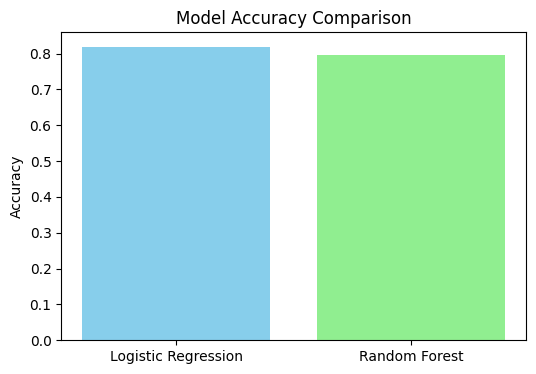

In [0]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['skyblue','lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


###🧾 STEP 7 — Confusion Matrix Visualization

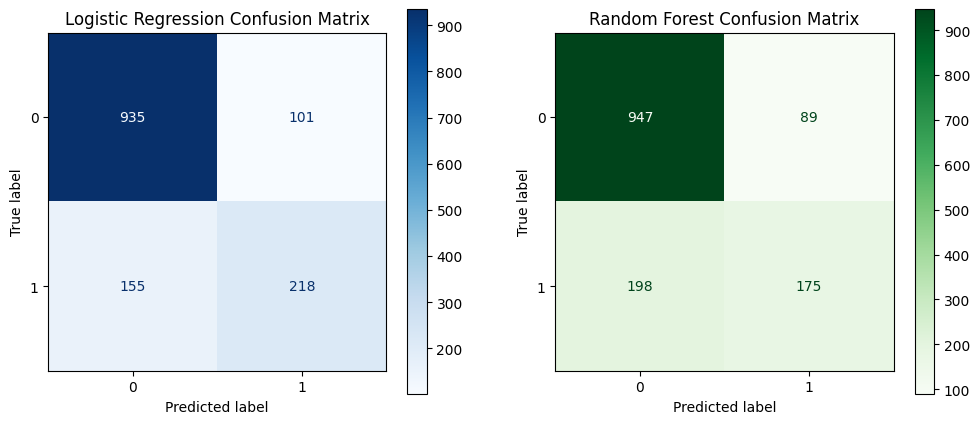

In [0]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest Confusion Matrix')

plt.show()
